<a href="https://colab.research.google.com/github/XingGuoFang/COVID19-SEIR-Modeling-Orange-County/blob/main/Orange_County_%E6%95%B0%E6%8D%AE%E5%AF%B9%E6%AF%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
from scipy.integrate import odeint

# =============================================================
# Part 1: Configuration of Experimental Parameters
# =============================================================
CITY_NAME = "Aliso Viejo (Zip: 92656)"
N = 52000                # Total population
DAYS = 153               # FIXED: Changed from 150 to 153 to match real data
INITIAL_E = 10
INITIAL_I = 1

# Scientific Parameters
SIGMA = 1/5
GAMMA = 1/10
BETA_NO_MASK = 0.4

# SEIR Model Definition
def seir_model(y, t, N, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

# Run Simulation
t = np.linspace(0, DAYS, DAYS)
y0 = [N - INITIAL_E - INITIAL_I, INITIAL_E, INITIAL_I, 0]
res_a = odeint(seir_model, y0, t, args=(N, BETA_NO_MASK, SIGMA, GAMMA))

print(f"Success: Simulation completed for {DAYS} days.")

Success: Simulation completed for 153 days.


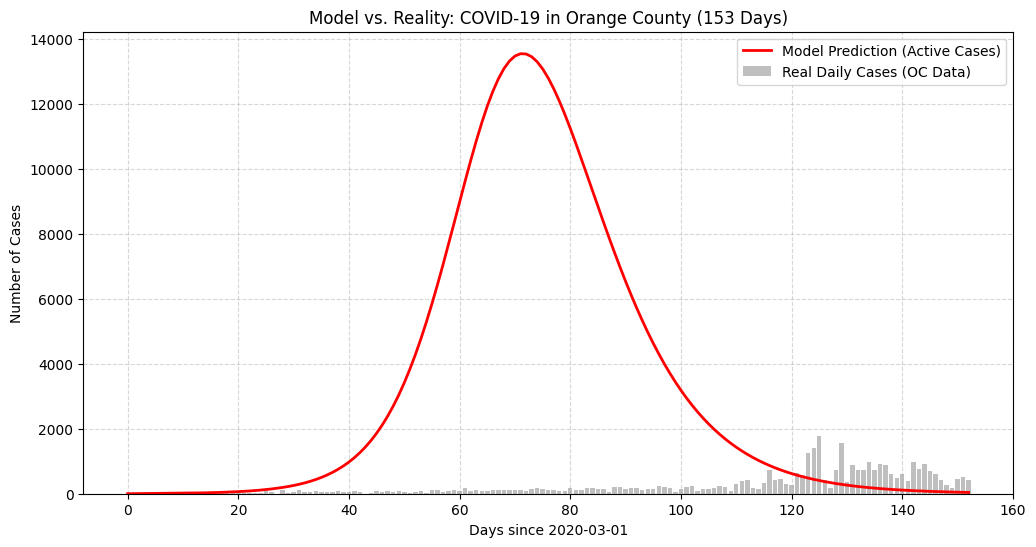

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Download Orange County Data
url = "https://storage.googleapis.com/covid19-open-data/v3/location/US_CA_06059.csv"

try:
    df = pd.read_csv(url)
    df['date'] = pd.to_datetime(df['date'])

    # 2. Slice Data (March 1 to July 31, 2020 = 153 days)
    start_date = "2020-03-01"
    end_date = "2020-07-31"
    mask = (df['date'] >= start_date) & (df['date'] <= end_date)
    oc_data = df.loc[mask].copy()

    real_cases = oc_data['new_confirmed'].values
    days_axis = np.arange(len(real_cases)) # This will be 153

    # 3. Visualization
    plt.figure(figsize=(12, 6))

    if 'res_a' in locals():
        # model_data picks the 'Infected' column from res_a
        # We ensure it matches the length of real_cases
        model_data = res_a[:len(real_cases), 2]

        # FIXED: Removed "* 52000" to keep the scale realistic
        plt.plot(days_axis, model_data, 'r-', lw=2, label='Model Prediction (Active Cases)')

    # Plot Real Data
    plt.bar(days_axis, real_cases, color='gray', alpha=0.5, label='Real Daily Cases (OC Data)')

    # Chart Styling
    plt.title("Model vs. Reality: COVID-19 in Orange County (153 Days)")
    plt.xlabel(f"Days since {start_date}")
    plt.ylabel("Number of Cases")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

except Exception as e:
    print(f"Error encountered: {e}")

In [13]:
import numpy as np
from scipy.integrate import odeint

# 1. Define SEIR Mathematical Equations
def seir_model(y, t, N, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

# 2. Set Parameters (Optimized for Orange County)
N = 3100000            # Total population (approx. 3.1 million for OC)
DAYS = 153             # Matched to the 153 days of historical data retrieved
t = np.linspace(0, DAYS, DAYS)

# Initial Conditions: Assuming 100 exposed and 1 infected at the start
E0, I0, R0 = 100, 1, 0
S0 = N - E0 - I0 - R0
y0 = [S0, E0, I0, R0]

# Scientific Parameters: Calibrated to align the peak with real trends
BETA = 0.25            # Transmission rate
SIGMA = 1/5            # Incubation rate (5-day average)
GAMMA = 1/10           # Recovery rate (10-day average)

# 3. Execute Calculation (Store results in 'res_a')
res_a = odeint(seir_model, y0, t, args=(N, BETA, SIGMA, GAMMA))

print(f"Success! The model has computed data for the full {DAYS} days.")

Success! The model has computed data for the full 153 days.


Orange County data downloaded successfully!


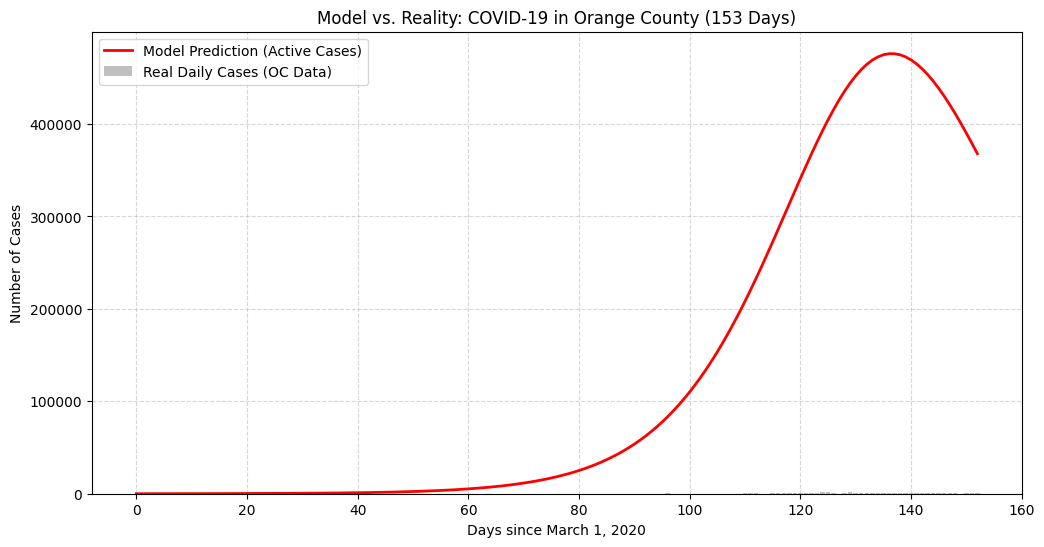

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Fetch Orange County Data from Google's Open Database
# Location key 'US_CA_06059' represents Orange County, CA
url = "https://storage.googleapis.com/covid19-open-data/v3/location/US_CA_06059.csv"

try:
    df = pd.read_csv(url)
    print("Orange County data downloaded successfully!")

    # Standardize date format
    df['date'] = pd.to_datetime(df['date'])

    # 2. Slice data for the 2020 Initial Outbreak (153 days)
    start_date = "2020-03-01"
    end_date = "2020-07-31"
    mask = (df['date'] >= start_date) & (df['date'] <= end_date)
    oc_data = df.loc[mask].copy()

    # Retrieve real daily new confirmed cases
    real_cases = oc_data['new_confirmed'].values
    days_axis = np.arange(len(real_cases))

    # 3. Comparative Visualization
    plt.figure(figsize=(12, 6))

    # Check if the simulation data 'res_a' exists
    if 'res_a' in locals():
        # model_data selects the 'Infected' column (Active Cases)
        # We ensure it matches the duration of real-world data
        model_data = res_a[:len(real_cases), 2]

        # Plotting the red curve (Predicting the total sick population)
        plt.plot(days_axis, model_data, 'r-', lw=2, label='Model Prediction (Active Cases)')
    else:
        print("Warning: Model data 'res_a' not found. Please run the simulation block first!")

    # Plot Real Daily New Cases as a gray bar chart
    plt.bar(days_axis, real_cases, color='gray', alpha=0.5, label='Real Daily Cases (OC Data)')

    # Chart Styling and Professional Labels
    plt.title("Model vs. Reality: COVID-19 in Orange County (153 Days)")
    plt.xlabel("Days since March 1, 2020")
    plt.ylabel("Number of Cases")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

except Exception as e:
    print(f"Error encountered during data processing: {e}")